In [28]:
import pandas as pd
import numpy as np

In [29]:
#Correcnt Directroty
import os
print(os.getcwd())

/content


In [30]:
#load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
dataset3 = pd.read_csv('/content/drive/MyDrive/Project/5.urldata.csv')

#Basic Analysis for (5) Data

In [32]:
dataset3.sample(5)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
1947,diply.com,0,0,1,3,0,0,0,0,0,1,0,0,0,0,1,0,0
719,web.de,0,0,1,5,0,0,0,0,0,1,1,1,0,0,1,0,0
7144,animalwelfareinc.org,0,0,1,7,0,0,0,0,0,1,0,0,0,0,1,0,1
6009,81cbd50754804973894115930bc620f5.testing-url.ws,0,0,1,6,0,0,0,1,0,1,1,1,0,0,1,0,1
4546,yourlust.com,0,0,1,2,0,0,1,0,0,1,1,1,0,0,1,0,0


In [33]:
#Show all features
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

#EDA ( Exploratory Data Analysis )

In [34]:
dataset3.shape

(10000, 18)

#CHECK NULL VALUE

In [35]:
dataset3.isnull().sum()

,0
Domain,0
Have_IP,0
Have_At,0
URL_Length,0
URL_Depth,0
Redirection,0
https_Domain,0
TinyURL,0
Prefix/Suffix,0
DNS_Record,0


In [36]:
dataset3.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


#Identify Highly Correlated Features


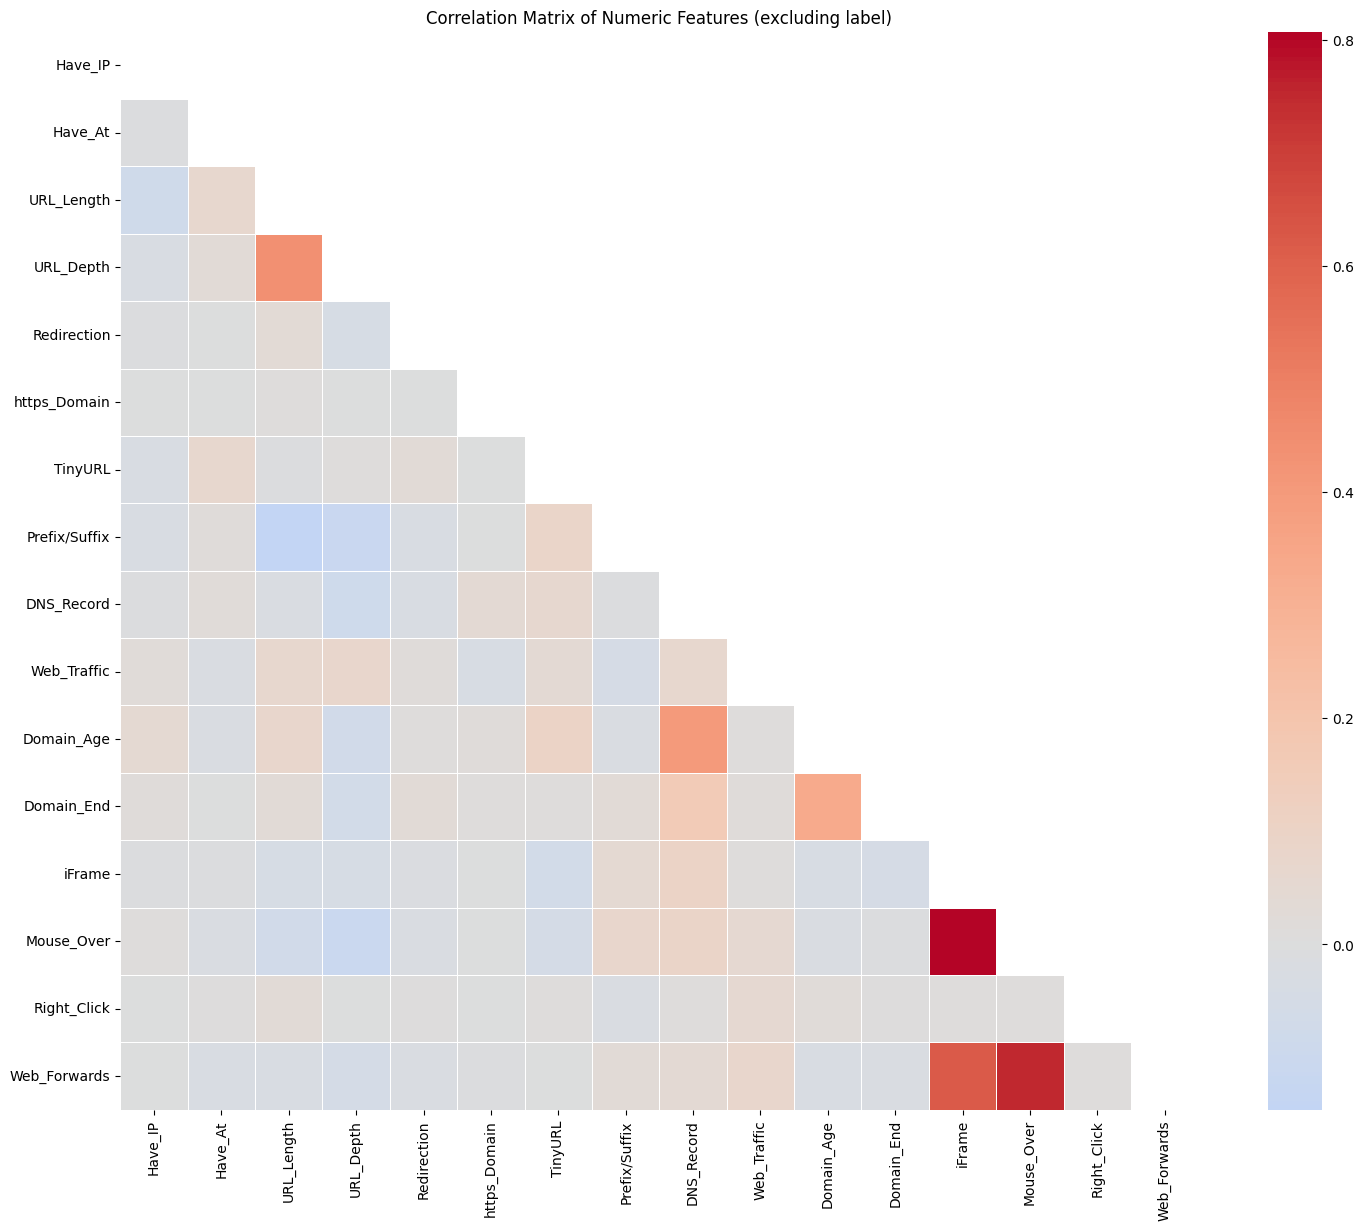

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
# Drop non-numeric columns temporarily for correlation check
numeric_df = dataset3.select_dtypes(include=[np.number]).drop(columns=['Label'])  #dataset (probably a DataFrame).
#✅This line selects only the numeric columns (ignores text, dates, etc.).
#✅Then it drops the column 'label', because you probably don't want to include the target variable (label) when checking feature correlations.

# Calculate the correlation matrix
corr_matrix = numeric_df.corr() #Calculates the correlation matrix.
#Each value shows the correlation coefficient between two features:
#+1 = perfect positive correlation
#-1 = perfect negative correlation
#0 = no correlation



# Create a mask to hide the upper triangle (to reduce duplicate values)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#np.triu() creates a mask that covers the upper triangle of the correlation matrix.
#Correlation matrices are symmetric (feature A with feature B = feature B with feature A), so hiding half avoids redundancy.



# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Draw the heatmap
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, annot=False, fmt=".2f")
#Uses Seaborn’s heatmap function:
#corr_matrix is what we plot.
#mask=mask hides the top triangle.
#cmap='coolwarm' gives a color range (blue for negative, red for positive correlations).
#center=0 centers the color map at zero.
#square=True makes the boxes square.
#linewidths=.5 draws thin white lines between boxes.
#annot=False means no numbers inside boxes (cleaner look).
#fmt=".2f" would format numbers if annot=True.



plt.title("Correlation Matrix of Numeric Features (excluding label)")
plt.show()

#List Highly Correlated Pairs (> 0.80)

In [39]:
# Flatten correlation matrix and sort
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove self correlations
corr_pairs = corr_pairs[corr_pairs < 1.0]

# Filter to show only those above 0.80 (or choose your threshold)
high_corr = corr_pairs[corr_pairs > 0.80]
print(high_corr)

Mouse_Over  iFrame        0.807077
iFrame      Mouse_Over    0.807077
dtype: float64


#Find Low Correlation Features


In [40]:
# Get correlation of features with the target
correlation_with_Result = dataset3.corr(numeric_only=True)['Label'].sort_values()

# View low-correlation features
low_corr_features = correlation_with_Result[correlation_with_Result.abs() < 0.05]
print("Low-correlation features:\n", low_corr_features)

Low-correlation features:
 Web_Forwards   -0.041376
Right_Click    -0.026467
Redirection     0.002600
https_Domain    0.014144
DNS_Record      0.015943
Name: Label, dtype: float64


#Drop Low-Correlation Features


In [41]:
#  Manually define the weakest ones to drop
features_to_drop = [
    'Web_Forwards', 'Right_Click', 'Redirection', 'https_Domain', 'DNS_Record'
]

dataset3_reduced = dataset3.drop(columns=features_to_drop)

# Step 4: Optional - Print before/after shape
print("\n✅ Shape before:", dataset3.shape)
print("✅ Shape after dropping low-correlation features:", dataset3_reduced.shape)



✅ Shape before: (10000, 18)
✅ Shape after dropping low-correlation features: (10000, 13)


#Combine Redundant Features (If Present)

In [42]:
def combine_redundant_features(df):
    import numpy as np

    combined_features = {
        'OverFrame': ['Mouse_Over', 'iFrame'],
        'FrameOver': ['iFrame', 'Mouse_Over']
    }

    for new_col, old_cols in combined_features.items():
        # Check if all required columns exist
        if all(col in df.columns for col in old_cols):
            # Combine using mean (you can also use sum or weighted avg)
            df[new_col] = df[old_cols].mean(axis=1)
            # Drop old columns
            df.drop(columns=old_cols, inplace=True)
            print(f"✅ Combined {old_cols} into '{new_col}' and dropped originals.")
        else:
            print(f"❌ Skipped {old_cols} — one or more columns not found.")

    return df

# Apply to your reduced DataFrame
dataset3_final = combine_redundant_features(dataset3_reduced)

# Final shape
print("\n📐 Final DataFrame shape:", dataset3_final.shape)

✅ Combined ['Mouse_Over', 'iFrame'] into 'OverFrame' and dropped originals.
❌ Skipped ['iFrame', 'Mouse_Over'] — one or more columns not found.

📐 Final DataFrame shape: (10000, 12)


In [43]:
# install xgboost
!pip install xgboost

#Train-Test Split + Feature Scaling


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = PhiURL_final.drop(columns=['Label'])
y = PhiURL_final['Label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numeric columns (you can adjust this if needed)
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Scaling numeric features
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

#Remove non-numeric columns (REMOVE STRING)


In [45]:
from sklearn.preprocessing import LabelEncoder

# Drop columns with string data (e.g., URLs) from the features
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

#MODEL TRANING



*   DecissionTree
*   Naive Bayes

*   KNeighbors
*   RandomForestClassifier

*   LogisticRegression
*   XGBoost

*   Multi-Layer Perceptron (MLP)
*   Support Vector Machine (SVM)


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize and train models
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    #"XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Training {name}...")

    # Fit the model using only numeric data
    model.fit(X_train_numeric, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_numeric)

    # Evaluate the model
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"🎯 F1 Score: {f1:.4f}")
    print(f"📋 Classification Report:\n{classification_report(y_test, y_pred)}")



🔍 Training DecisionTree...
✅ Accuracy: 0.8523
🎯 F1 Score: 0.8295
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1537
           1       0.95      0.74      0.83      1463

    accuracy                           0.85      3000
   macro avg       0.87      0.85      0.85      3000
weighted avg       0.87      0.85      0.85      3000


🔍 Training RandomForest...
✅ Accuracy: 0.8533
🎯 F1 Score: 0.8309
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1537
           1       0.95      0.74      0.83      1463

    accuracy                           0.85      3000
   macro avg       0.87      0.85      0.85      3000
weighted avg       0.87      0.85      0.85      3000


🔍 Training LogisticRegression...
✅ Accuracy: 0.7937
🎯 F1 Score: 0.7525
📋 Classification Report:
              precision    recall  f1-score   support

           0

#📈Corresponding Confusion Matrix


*   True Positive (TP) - Your model predicted the positive class. For example, identifying a spam email as spam.
*   True Negative (TN) - Your model correctly predicted the negative class. For example, identifying a regular email as not spam.

*   False Positive (FP) - Your model incorrectly predicted the positive class. For example, identifying a regular email as spam.
*   False Negative (FN) - Your model incorrectly predicted the negative class. For example, identifying a spam email as a regular email.

In [47]:
pip install seaborn matplotlib

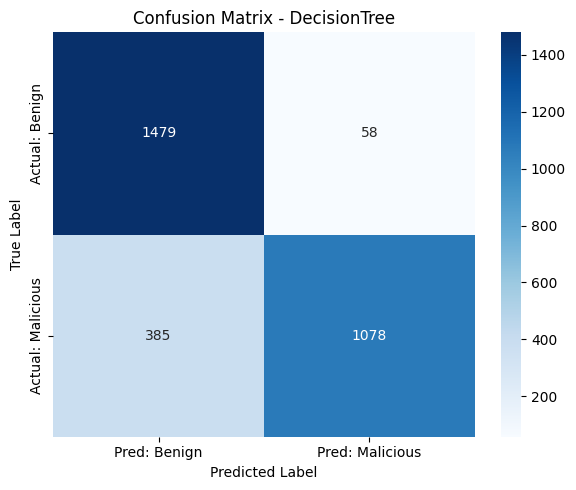

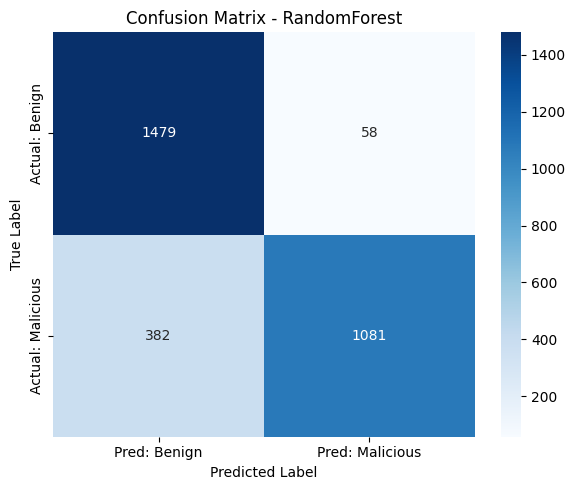

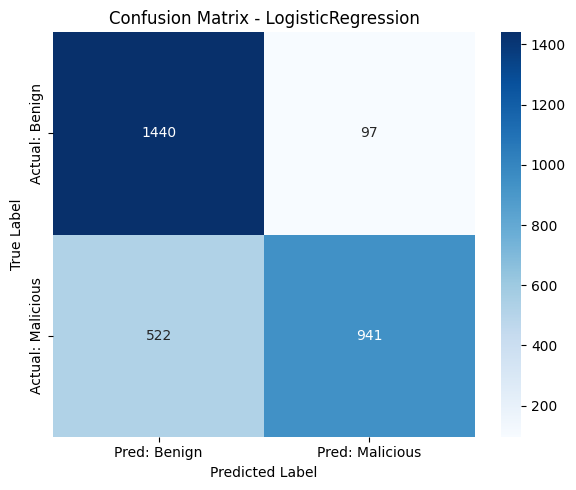

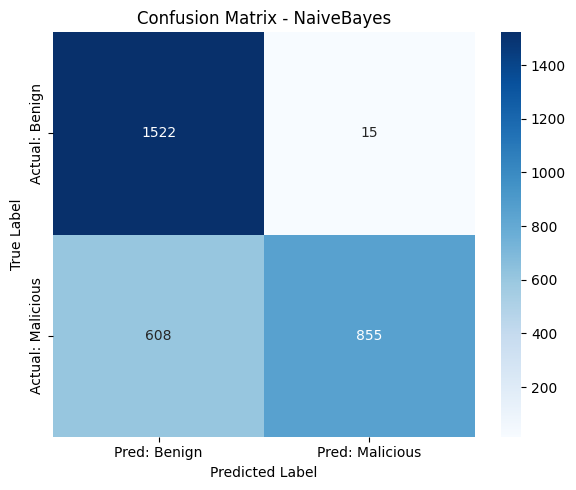

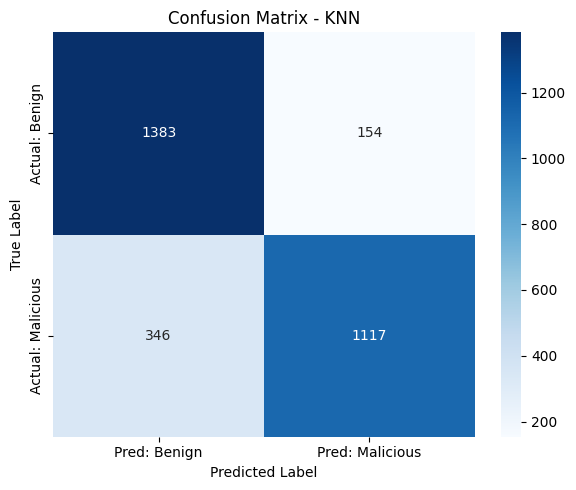

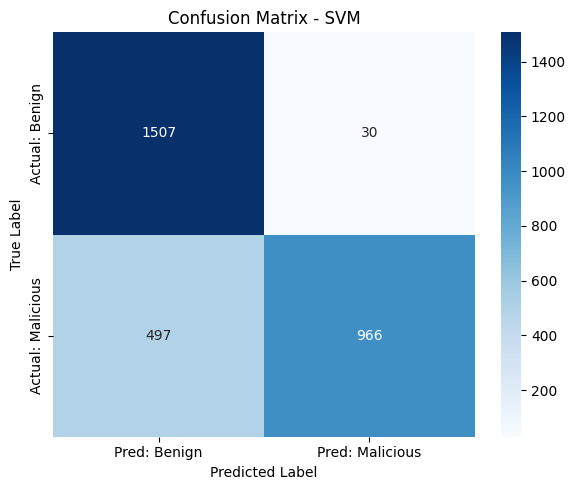

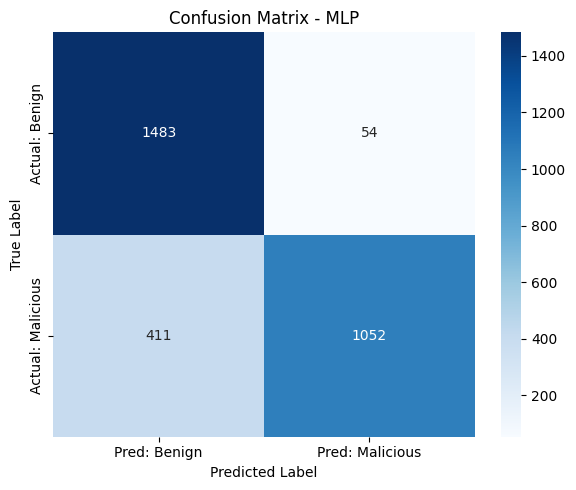

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate and visualize confusion matrices for all trained models
for name, model in models.items():
    # Predict
    y_pred = model.predict(X_test_numeric)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred: Benign', 'Pred: Malicious'],
                yticklabels=['Actual: Benign', 'Actual: Malicious'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

#✅ Accuracy & Precision Bar Chart

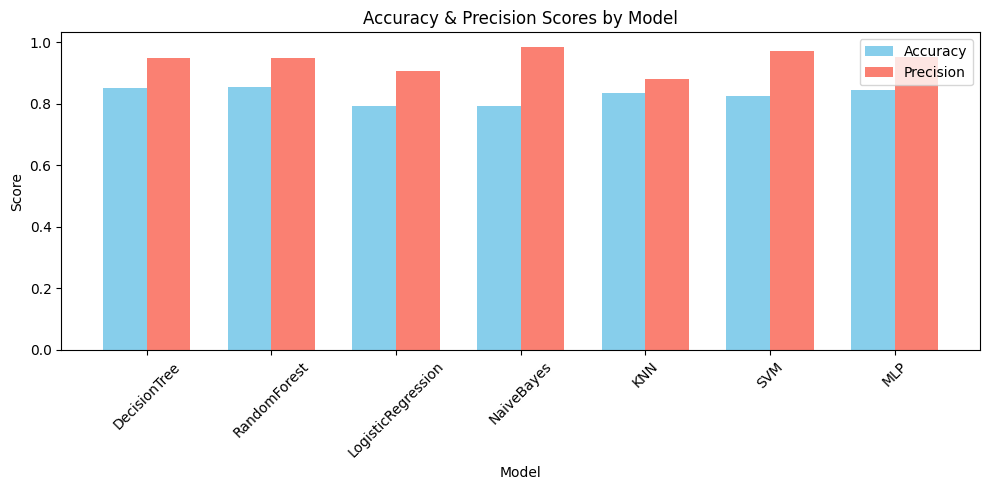

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score

# Store results
accuracy_scores = {}
precision_scores = {}

# Collect scores
for name, model in models.items():
    y_pred = model.predict(X_test_numeric)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred)

# Plot
plt.figure(figsize=(10, 5))
bar_width = 0.35
model_names = list(models.keys())

# Bar positions
x = range(len(models))
acc = [accuracy_scores[m] for m in model_names]
prec = [precision_scores[m] for m in model_names]

plt.bar(x, acc, width=bar_width, label='Accuracy', color='skyblue')
plt.bar([i + bar_width for i in x], prec, width=bar_width, label='Precision', color='salmon')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy & Precision Scores by Model')
plt.xticks([i + bar_width / 2 for i in x], model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#✅ ROC Curve & AUC (Area Under Curve)

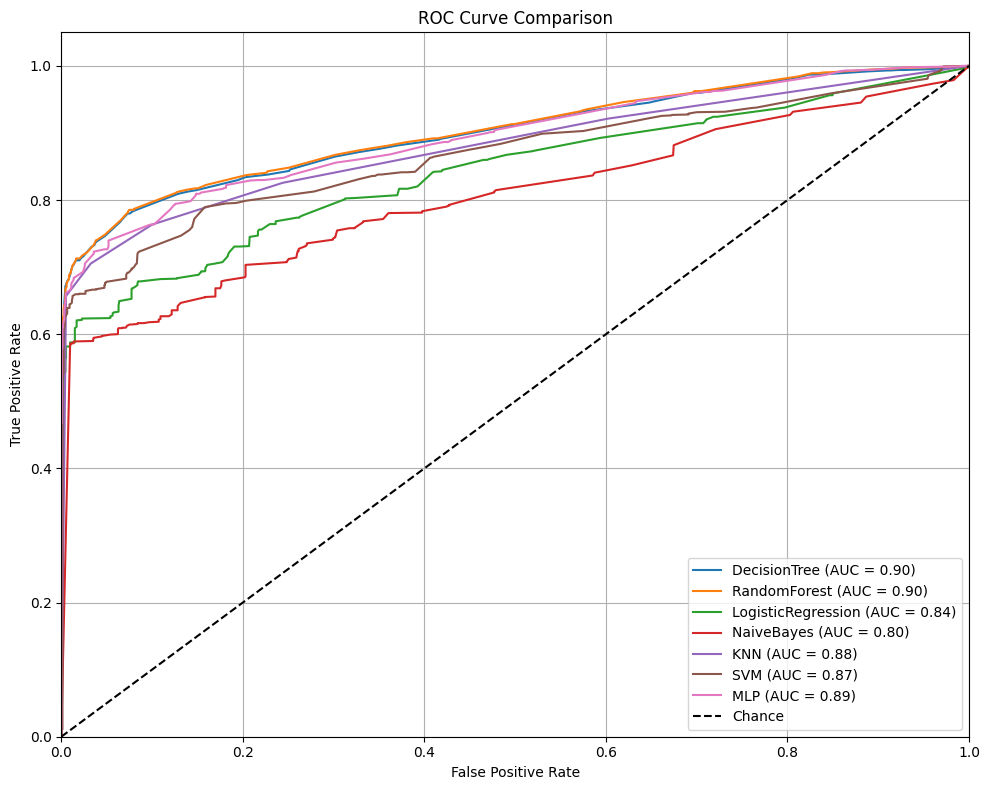

In [50]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Ensure binary labels (0 and 1)
y_true = y_test if set(y_test) == {0, 1} else label_binarize(y_test, classes=[0, 1]).ravel()

plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Some classifiers (like SVC without `probability=True`) don't support predict_proba
    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test_numeric)[:, 1]
        else:
            y_score = model.decision_function(X_test_numeric)
    except:
        print(f"⚠️ Skipping {name}: No probability/score output.")
        continue

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot chance line
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()